# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

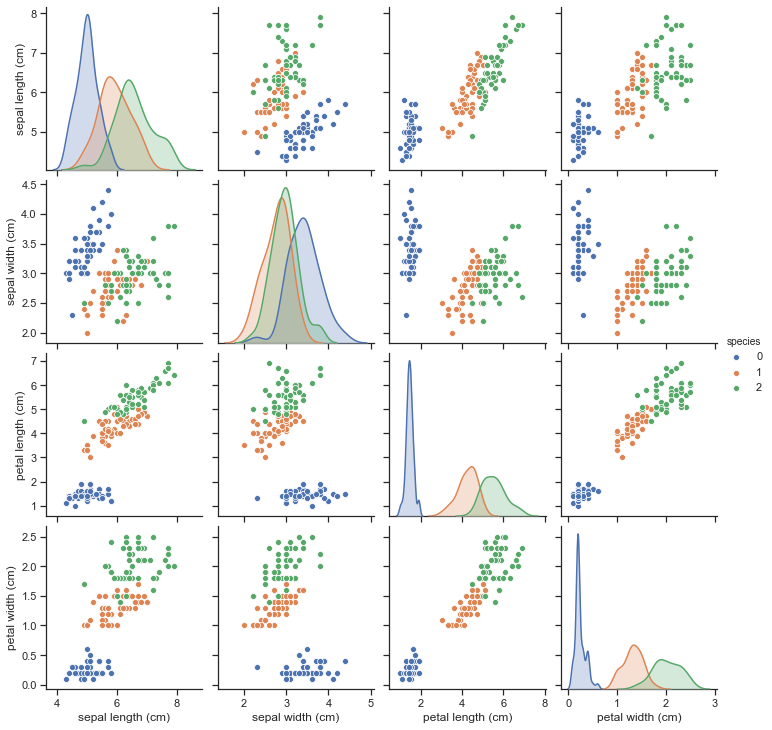

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [36]:
# define plotting function
def myplotGrid(X, y, features):
    """Function that plots a grid of charts
        
        Parameters
        ----------
        X : NumPy array
            Contains the data to be plotted
        y : NumPy array
            Contains the labels of for each data
        features : list
            List string of names of features
    """
    # get unique list of labels
    labels = np.unique(y)
    # as we have 4 features, create 4 x 4 axs
    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    for i, ax_row in enumerate(axs):
        for j, ax in enumerate(ax_row):
            x_data = X[:, j]
            y_data = X[:, i]
            # if the two features are the same do a histogram plot
            if i == j:
                for label in labels:
                    ax.hist(x_data[y == label], histtype='step', label=label, fill=True, alpha=0.5)
            #otherwise do a scatter plot
            else:
                for label in labels:
                    ax.scatter(x_data[y == label], y_data[y == label], label=label)
            # set labels on the outer plots only
            if i == 3:
                ax.set_xlabel(features[j])
            if j == 0:
                ax.set_ylabel(features[i])
            # remove ticks on x axis for inner plots
            if i != 3:
                ax.tick_params(labelbottom=False)
    handles, labels = axs[0][1].get_legend_handles_labels()
    fig.legend(handles, labels, title='Classes', loc='right')
    plt.show()

<span style='color: red'>Note: </span>For this scatter matrix, I am keeping the y-ticks on all plots because the histograms have a different scale.

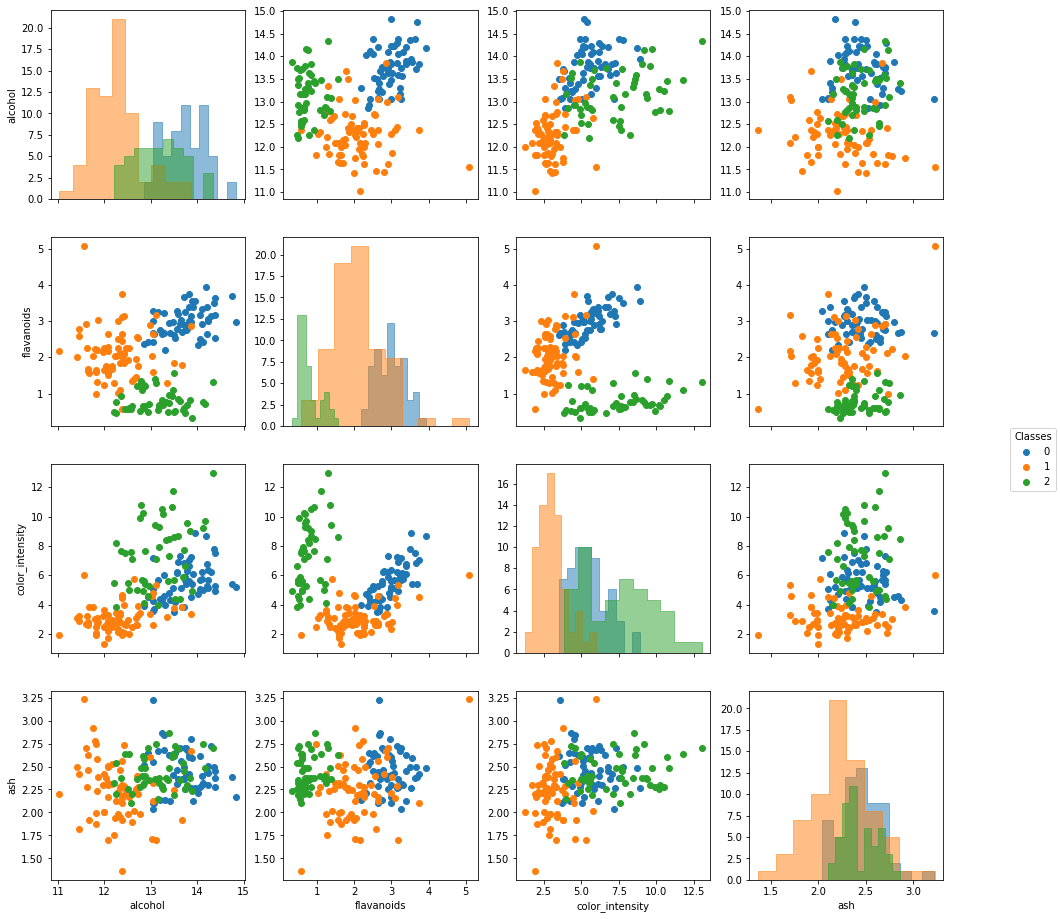

In [37]:
# run the plotting function
myplotGrid(X, y, selected_features)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

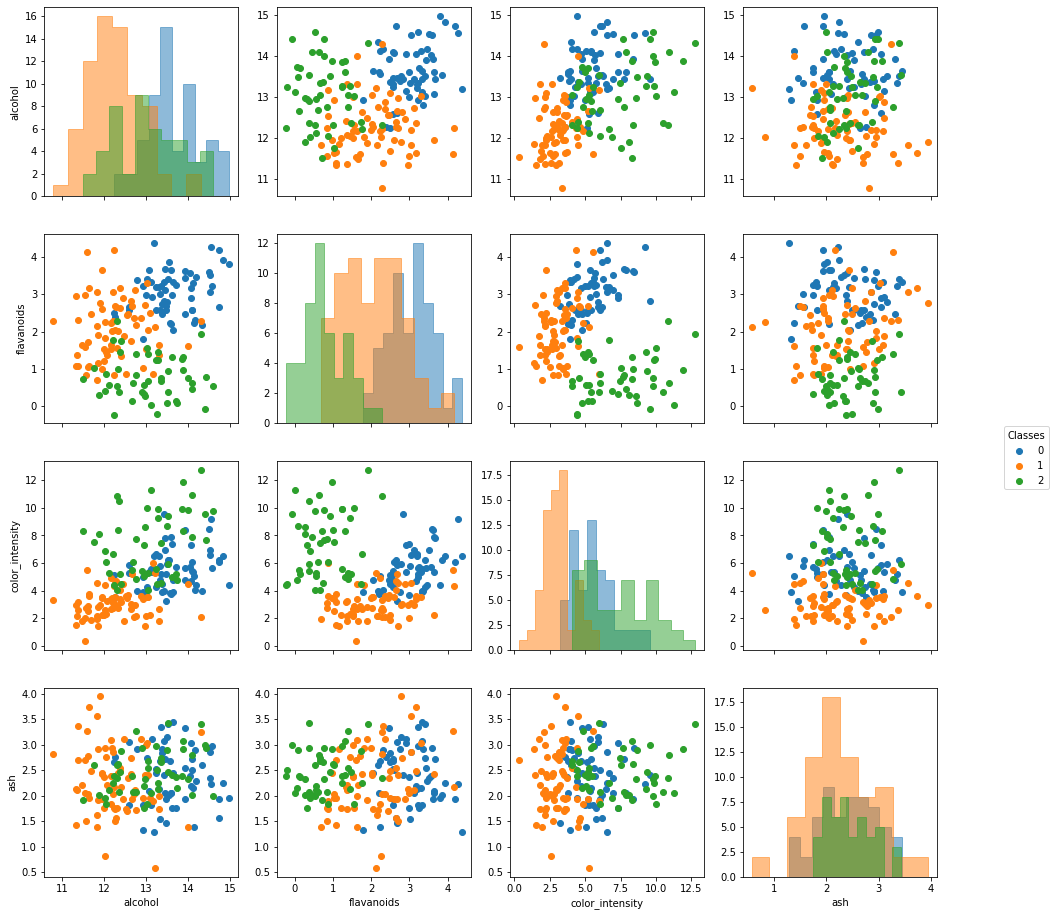

In [38]:
# noise code 
# initialize random seed to replicate results over different runs
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)

myplotGrid(XN,y, selected_features)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
The two features I would choose is _color_intensity_ and _flavanoids_.
From the chart I can see that the overlap in the data points for the classes is not as extreme the other datapoints. Both on the original datan and the data with noise.


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

The data with noise is a lot more spread out and the classes overlap more.

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# dictionary that stores distance functions
distance_functions = {
    'euclidean': lambda vec, mat: np.sqrt(np.sum((vec - mat) ** 2, axis=1)),
    'manhattan': lambda vec, mat: np.sum(np.abs(vec - mat), axis=1)
}

In [6]:
# mykNN code
# train_data = np.array([
#     [10, 13, 16],
#     [1.2, 2.2, 3.3],
#     [24, 24, 25],
#     [1, 2, 3],
# ])

# train_labels = np.array([2, 9, 1 ,9])

# test_data = np.array([[1.1, 2.1, 3.1]])


def mykNN(X, y, X_, k=5, metric='euclidean'):
    """Function that performs k nearest neighbour
    
    Parameters
    ----------
    X : NumPy array
        Contains the array of training values
    y : NumPy array
        Contains the array of labels
    X_ : NumPy array
        The data to be classified
    k : Integer
        The number of nearest neighbours to consider
    metric : String
        The distance function to be used
        
    Returns
    -----------
    labels : NumPy array
        Array of predicted values
    """
    distance_function = distance_functions[metric]
    predictions = []
    for test in X_:
        # calculate distances for each value from all the training data
        distances = distance_function(test, X)
        # sort the values by closest and get sorted indices
        distances_argsort = distances.argsort()
        # apply the sorted indices to labels and plist first k values
        k_nearest_labels = y[distances_argsort][:k]
        # count the number of occurrences of each label and get the one with the highest ocurrence
        label = np.bincount(k_nearest_labels).argmax()
        # add label to list of predictions
        predictions.append(label)
    return np.array(predictions)
        
        
# mykNN(train_data, train_labels, test_data, k=3)

## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [24]:
# confusion matrix, accuracy, precision, recall, etc. 
def my_confusion_matrix(y, y_):
    """Function that generates a confusion matrix

    Parameters
    ----------
    y : NumPy array
        Contains the array of real value of classes
    y_ : NumPy array
        Contains the array of predicted value of classes
    Returns
    -----------
    confusion matrix: NumPy array
    """
    classno = len(np.unique(y))
    cm = np.zeros((classno, classno))
    for i in range(len(y)):
        # increment the value by one for each row/column
        # if the classes are the same the value will be incremented at the diagonal
        cm[y[i], y_[i]] += 1
    return cm

def pretty_confusion_matrix(cm):
    """Function that prints out a confusion matrix in a readable format

    Parameters
    ----------
    cm : NumPy array
        Confusion matrix to be printed
    """
    print('                     =========True Values=======')
    print('                     Class 0 | Class 1 | Class 2')
    print('         || Class 1 |{:^8}|{:^9}|{:^9}'.format(cm[0][0], cm[0][1], cm[0][2]))
    print('Predicted|| Class 2 |{:^8}|{:^9}|{:^9}'.format(cm[1][0], cm[1][1], cm[1][2]))
    print('         || Class 3 |{:^8}|{:^9}|{:^9}'.format(cm[2][0], cm[2][1], cm[2][2]))

def my_accuracy(y, y_):
    """Function that generates calculates accuracy

    Parameters
    ----------
    y : NumPy array
        Contains the array of real value of classes
    y_ : NumPy array
        Contains the array of predicted value of classes
    Returns
    -----------
    accuracy : float
        Accuracy, correct / size
    """
    correct = 0
    size = len(y)
    for i in range(size):
        if(y[i] == y_[i]):
            correct += 1
    return correct / size



In [25]:
# test evaluation code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sklearnkNN = KNeighborsClassifier(n_neighbors=5)
sklearnkNN.fit(X_train, y_train)

sklearn_pred = sklearnkNN.predict(X_test)
my_pred = mykNN(X_train, y_train, X_test)

print(sklearn_pred)
print(my_pred)

print(confusion_matrix(y_test, sklearn_pred))
print(my_confusion_matrix(y_test, my_pred))
pretty_confusion_matrix(my_confusion_matrix(y_test, my_pred))

print(accuracy_score(y_test, sklearn_pred))
print(my_accuracy(y_test, my_pred))



precision_score(y_test, my_pred, average='micro')
# precision same as accuracy???? 

[0 0 0 0 0 0 2 0 0 0 0 1 1 1 2 0 1 2 1 1 1 2 0 0 1 0 2 1 2 0 0 0 0 2 1 0]
[0 0 0 0 0 0 2 0 0 0 0 1 1 1 2 0 1 2 1 1 1 2 0 0 1 0 2 1 2 0 0 0 0 2 1 0]
[[14  0  0]
 [ 5 10  1]
 [ 0  0  6]]
[[14.  0.  0.]
 [ 5. 10.  1.]
 [ 0.  0.  6.]]
                     =========True Values=======
                     Class 0 | Class 1 | Class 2
         || Class 1 |  14.0  |   0.0   |   0.0   
Predicted|| Class 2 |  5.0   |  10.0   |   1.0   
         || Class 3 |  0.0   |   0.0   |   6.0   
0.8333333333333334
0.8333333333333334


0.8333333333333334


## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [9]:
# parameters for testing code
nFolds = 4
np.random.seed(mySeed)

# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)


In [10]:
# myNestedCrossVal code

for iFold in range(0,nFolds):
    testFold = indices[iFold]
    print('new iterration')
    
    remaining_folds = np.delete(range(0,nFolds), iFold)
    validationFold = indices[ remaining_folds[0] ]
    
    print('Remaining folds', remaining_folds)
    print('Validation fold', validationFold)
    print('test fold', testFold)

new iterration
Remaining folds [1 2 3]
Validation fold [  4 103  28 136 106  19 117 134  56 110  98  92  95  15  47  73  79   8
  13  99  84  25 165 102   9  86  60 145 141  85 111  45  69  71 128 162
  65 104 167  94 137  37  49  66   6]
test fold [109  68 176  55 149  17  70  93 153 151  67 112  78  35  42  16  89 122
 100  61 175 116 160 161 125  10 152 120 159  40  33  48 148  24  54   2
  51 121 174  20 172 135  52 150  39]
new iterration
Remaining folds [0 2 3]
Validation fold [109  68 176  55 149  17  70  93 153 151  67 112  78  35  42  16  89 122
 100  61 175 116 160 161 125  10 152 120 159  40  33  48 148  24  54   2
  51 121 174  20 172 135  52 150  39]
test fold [  4 103  28 136 106  19 117 134  56 110  98  92  95  15  47  73  79   8
  13  99  84  25 165 102   9  86  60 145 141  85 111  45  69  71 128 162
  65 104 167  94 137  37  49  66   6]
new iterration
Remaining folds [0 1 3]
Validation fold [109  68 176  55 149  17  70  93 153 151  67 112  78  35  42  16  89 122
 100  

In [26]:
# myNestedCrossVal code

# for iFold in range(0,nFolds):
#     testFold = indices[iFold]
#     print('new iterration')
    
#     remaining_folds = np.delete(range(0,nFolds), iFold)
#     validationFold = indices[ remaining_folds[0] ]

def myNestedCrossVal(X, y, folds, ks, metrics, seed):
    """Function that performs nested cross validation

    Parameters
    ----------
    X : NumPy array
        Contains the data array
    y : NumPy array
        Contains the array of classes that correspond to the data
    folds : Integer
        The number of folds
    ks : list
        range of k values to evaluate
    metrics : list
        list of distance functions to use
    seed: Integer
        seed for NumPy random generator of permutation for fold indices
        
    Returns
    -----------
    accuracies, confusion matrix: 2-Tuple
        A double containg list of accuracies for each fold and list of confusion matrices for each fold
    """
    
    def train_test_split(X_data, y_data, train_size=0.8):
        """Function that splits data into training and testing samples

        Parameters
        ----------
        X_data : NumPy array
            Contains the data array
        y_data : NumPy array
            Contains the array of classes that correspond to the data
        train_size : float
            Proportion of data that will be used for testing
    
        Returns
        -----------
        X_train : NumPy array
            contains the training data
        y_train : Numpy array
            contains the training labels
        X_test : NumPy array
            contains the testing data
        y_test : Numpy array
            contains the testing labels
        """
        train_length = int(len(X_data) * train_size)
        return (X_data[:train_length],  X_data[train_length:], y_data[:train_length], y_data[train_length:])
    
    np.random.seed(seed)
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, folds)
    #store errors for each fold
    fold_accuracies = []
    confusion_matrices = []
    
    for loop_idx, i_fold in enumerate(indices):
        i = loop_idx + 1
        print('Fold', i)
        # Create mask for folds
        mask = np.ones(len(X), dtype=bool)
        mask[i_fold] = False
        
        X_train_outer = X[mask]
        X_test = X[i_fold]
        y_train_outer = y[mask]
        y_test = y[i_fold]
        
        X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train_outer, y_train_outer, train_size=(1-(1/folds)))
        
        # set the best validation accuracy to negative infinity
        best_val_accuracy = -float("inf")
        # evaluate hyperparameters
        for k in ks:
            for metric in metrics:
                y_pred = mykNN(X_train_inner, y_train_inner, X_val, k=k, metric=metric)
                val_accuracy = my_accuracy(y_val, y_pred)
                
                if(val_accuracy > best_val_accuracy):
                    best_val_accuracy = val_accuracy
                    best_k = k
                    best_metric = metric
                
                print('Accuracy for k={}, metric={}: {}'.format(k, metric, val_accuracy))
        
        print('Best parameters for fold {}: \nk: {}, metric: {}, accuracy: {:.2f}'.format(i, best_k, best_metric, best_val_accuracy))
        y_pred = mykNN(X_train_outer, y_train_outer, X_test, k=best_k, metric=best_metric)

        fold_accuracies.append(
            my_accuracy(y_test, y_pred)
        )
        
        confusion_matrix = my_confusion_matrix(y_test, y_pred)
        print('Confusion matrix for fold {}: \n{}\n'.format(i, confusion_matrix))
        confusion_matrices.append(
            confusion_matrix
        )
        
    return fold_accuracies, confusion_matrices

In [12]:
# evaluate clean data code
accuracies, confusion_matrices_clean = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print('Mean of clean data: {:.2f}'.format(np.mean(accuracies)))
print('Standard deviation of clean data: {:.2f}'.format(np.std(accuracies)))

Fold 1
Accuracy for k=1, metric=euclidean: 0.8620689655172413
Accuracy for k=1, metric=manhattan: 0.7931034482758621
Accuracy for k=2, metric=euclidean: 0.5862068965517241
Accuracy for k=2, metric=manhattan: 0.6551724137931034
Accuracy for k=3, metric=euclidean: 0.6206896551724138
Accuracy for k=3, metric=manhattan: 0.7586206896551724
Accuracy for k=4, metric=euclidean: 0.5517241379310345
Accuracy for k=4, metric=manhattan: 0.6896551724137931
Accuracy for k=5, metric=euclidean: 0.5862068965517241
Accuracy for k=5, metric=manhattan: 0.6896551724137931
Accuracy for k=6, metric=euclidean: 0.5862068965517241
Accuracy for k=6, metric=manhattan: 0.5862068965517241
Accuracy for k=7, metric=euclidean: 0.6206896551724138
Accuracy for k=7, metric=manhattan: 0.7241379310344828
Accuracy for k=8, metric=euclidean: 0.5862068965517241
Accuracy for k=8, metric=manhattan: 0.6551724137931034
Accuracy for k=9, metric=euclidean: 0.5862068965517241
Accuracy for k=9, metric=manhattan: 0.6551724137931034
Acc

In [13]:
# evaluate noisy  data code
accuracies, confusion_matrices_noisy = myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print('Mean of noisy data: {:.2f}'.format(np.mean(accuracies)))
print('Standard deviation of noise data:  {:.2f}'.format(np.std(accuracies)))

Fold 1
Accuracy for k=1, metric=euclidean: 0.6551724137931034
Accuracy for k=1, metric=manhattan: 0.6551724137931034
Accuracy for k=2, metric=euclidean: 0.5172413793103449
Accuracy for k=2, metric=manhattan: 0.5517241379310345
Accuracy for k=3, metric=euclidean: 0.6206896551724138
Accuracy for k=3, metric=manhattan: 0.6896551724137931
Accuracy for k=4, metric=euclidean: 0.5517241379310345
Accuracy for k=4, metric=manhattan: 0.6551724137931034
Accuracy for k=5, metric=euclidean: 0.5517241379310345
Accuracy for k=5, metric=manhattan: 0.6551724137931034
Accuracy for k=6, metric=euclidean: 0.4827586206896552
Accuracy for k=6, metric=manhattan: 0.5172413793103449
Accuracy for k=7, metric=euclidean: 0.5172413793103449
Accuracy for k=7, metric=manhattan: 0.5172413793103449
Accuracy for k=8, metric=euclidean: 0.41379310344827586
Accuracy for k=8, metric=manhattan: 0.4827586206896552
Accuracy for k=9, metric=euclidean: 0.41379310344827586
Accuracy for k=9, metric=manhattan: 0.5172413793103449
A

## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.86  |  1 | euclidean  |
| 2 | 0.97  |  1 | euclidean  |
| 3 | 0.86  |  1 | manhattan  |
| 4 | 0.86  |  5 | manhattan  |
| 5 | 0.79  |  1 | manhattan  |
| **total** | 0.94 $\pm$ 0.03 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.69  |  3 | manhattan  |
| 2 | 0.59 |  3 | manhattan  |
| 3 | 0.59  |  1 | euclidian  |
| 4 | 0.55  |  1 | euclidian  |
| 5 | 0.62  |  3 | manhattan  |
| **total** | 0.91 $\pm$ 0.05 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [22]:
print('CLEAN')
# clean data summary results
pretty_confusion_matrix(confusion_matrices_clean[2])


print('NOISY')
# clean data summary results
pretty_confusion_matrix(confusion_matrices_noisy[1])

CLEAN
                     =========True Values=======
                     Class 0 | Class 1 | Class 2
         || Class 1 |  13.0  |   0.0   |   0.0   
Predicted|| Class 2 |  3.0   |   8.0   |   0.0   
         || Class 3 |  0.0   |   0.0   |  12.0   
NOISY
                     =========True Values=======
                     Class 0 | Class 1 | Class 2
         || Class 1 |  13.0  |   1.0   |   0.0   
Predicted|| Class 2 |  1.0   |  13.0   |   1.0   
         || Class 3 |  0.0   |   0.0   |   7.0   


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:
When the data is clean, the majority of k values are 1 which also give the best accuracy. Whereas the majority of k values for noisy data is 3, which also give the best accuracy. This indicates that when training with clean data, the model is overfitting.

The parameter choice for noisy data is better as it would result in better generalisation. k value of 1 suggests that the model is overfitting.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

if the classes returned for k=2 are different, to break the tie I would run the classifier again with k=1 so that the closest value is chosen as the class.

Pseudocode:
```python (for formatting)
classes = knn(data, k=2)
if classes[0] != classes[1] then
    classes = knn(data, k=1)
endif
class = classes[0]
```

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:
The function that creates confusion matrices relies on the fact that the classes are integer values. If this is not the case then a bespoke template for the dataset needs to be made.
A different dataset may have different number of classes. The pretty print for the confusion matrices may need to take that into account. 